# *Air Quality Prediction Model In PyTorch* 

In [164]:
 #importing all required libraries
import torch
import torch.nn.functional as F
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import matplotlib.pyplot as plt
from pathlib import Path
torch.__version__

'2.4.1+cu121'

In [165]:
#device agnostic code
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [166]:
#loading dataset
df=pd.read_csv("/kaggle/input/air-quality-and-pollution-assessment/updated_pollution_dataset.csv")
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [167]:
#some visualization
df.max(), df.min()

(Temperature                       58.6
 Humidity                         128.1
 PM2.5                            295.0
 PM10                             315.8
 NO2                               64.9
 SO2                               44.9
 CO                                3.72
 Proximity_to_Industrial_Areas     25.8
 Population_Density                 957
 Air Quality                       Poor
 dtype: object,
 Temperature                      13.4
 Humidity                         36.0
 PM2.5                             0.0
 PM10                             -0.2
 NO2                               7.4
 SO2                              -6.2
 CO                               0.65
 Proximity_to_Industrial_Areas     2.5
 Population_Density                188
 Air Quality                      Good
 dtype: object)

In [168]:
#extracting labels 
np.unique(df['Air Quality'])

array(['Good', 'Hazardous', 'Moderate', 'Poor'], dtype=object)

In [169]:
label_mapping={'Good':3,  'Moderate':2, 'Poor':1,'Hazardous':0}

In [170]:
X=df.drop('Air Quality', axis=1).values
Y=df['Air Quality'].values
Y_encoded=[label_mapping[label] for label in Y]

In [171]:
Y_encoded[1:5]

[2, 2, 3, 3]

In [172]:
#train test split and standardizing(z-score)

X_train, X_test, Y_train, Y_test=train_test_split(X,Y_encoded, test_size=0.2, random_state=10)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [173]:
X_train=torch.tensor(X_train, dtype=torch.float32).to(device)
X_test=torch.tensor(X_test, dtype=torch.float32).to(device)
Y_train=torch.tensor(Y_train, dtype=torch.long).to(device)
Y_test=torch.tensor(Y_test, dtype=torch.long).to(device)

In [174]:
X_train.shape, Y_train.shape

(torch.Size([4000, 9]), torch.Size([4000]))

In [175]:
class NeuralNet(nn.Module):
    def __init__(self, n_features, n_classes):
        super().__init__()
        self.fc1=nn.Linear(n_features, 16)
        self.fc2=nn.Linear(16,8)
        self.fc3=nn.Linear(8,n_classes)

    def forward(self, input):
        l1=F.relu(self.fc1(input))
        l2=F.relu(self.fc2(l1))
        output=self.fc3(l2)
        return output

In [176]:
torch.manual_seed(10)
model=NeuralNet(9,4).to(device)

In [177]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0279, -0.0114, -0.1250,  0.0767, -0.1907, -0.0588,  0.1292,  0.3129,
           0.0785],
         [-0.1131,  0.0320, -0.0374,  0.1361,  0.0382,  0.1306,  0.3233, -0.1384,
          -0.0118],
         [ 0.0767, -0.0022, -0.0319, -0.2950, -0.2875, -0.3000, -0.3262, -0.3104,
          -0.2525],
         [-0.3006, -0.3127,  0.1461,  0.2044,  0.2252,  0.1796,  0.1129,  0.1468,
          -0.1843],
         [ 0.3001, -0.0230,  0.2876,  0.1022,  0.2609,  0.2659, -0.0696, -0.0969,
           0.0502],
         [-0.0142,  0.0521,  0.1691, -0.2605, -0.0153, -0.2616,  0.3219, -0.2344,
           0.0638],
         [-0.0911,  0.1895,  0.0011, -0.0335,  0.2440,  0.3045, -0.2419, -0.3215,
           0.0278],
         [ 0.1050,  0.0761,  0.3079,  0.1496, -0.1533, -0.2283,  0.2586,  0.3195,
          -0.1582],
         [-0.2133,  0.1167, -0.2384, -0.0807, -0.3297,  0.0912, -0.1137, -0.1865,
          -0.2120],
         [-0.1173,  0.1583,  0.0189,  0.2870, -0.1191, -0.0

In [178]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.01)

In [179]:
#training loop
epochs=150
epoch_count=[]
loss_val=[]
test_loss_val=[]
for epoch in range(epochs):
    model.train()
    Y_logits=model(X_train).squeeze()
    Y_probs=F.softmax(Y_logits, dim=1)
    # Get the predicted class indices
    _, Y_pred = torch.max(Y_probs, dim=1)
    loss=loss_fn(Y_logits,Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits=model(X_test).squeeze()
        test_probs=F.softmax(test_logits, dim=1)
        # Get the predicted class indices
        _, test_pred = torch.max(test_probs, dim=1)
        test_loss= loss_fn(test_logits,Y_test)
        epoch_count.append(epoch+1)
        loss_val.append(loss.detach().cpu().numpy())
        test_loss_val.append(test_loss.cpu().numpy())
    if epoch%10==0:
        print(f" epoch:{epoch} | train_loss:{loss:.4f} | dev_loss:{test_loss:.4f}\n")


 epoch:0 | train_loss:1.4268 | dev_loss:1.3875

 epoch:10 | train_loss:0.9849 | dev_loss:0.9279

 epoch:20 | train_loss:0.5571 | dev_loss:0.5256

 epoch:30 | train_loss:0.3464 | dev_loss:0.3489

 epoch:40 | train_loss:0.2461 | dev_loss:0.2582

 epoch:50 | train_loss:0.1966 | dev_loss:0.2092

 epoch:60 | train_loss:0.1717 | dev_loss:0.1872

 epoch:70 | train_loss:0.1585 | dev_loss:0.1761

 epoch:80 | train_loss:0.1510 | dev_loss:0.1667

 epoch:90 | train_loss:0.1462 | dev_loss:0.1602

 epoch:100 | train_loss:0.1429 | dev_loss:0.1564

 epoch:110 | train_loss:0.1403 | dev_loss:0.1526

 epoch:120 | train_loss:0.1379 | dev_loss:0.1487

 epoch:130 | train_loss:0.1356 | dev_loss:0.1451

 epoch:140 | train_loss:0.1334 | dev_loss:0.1421



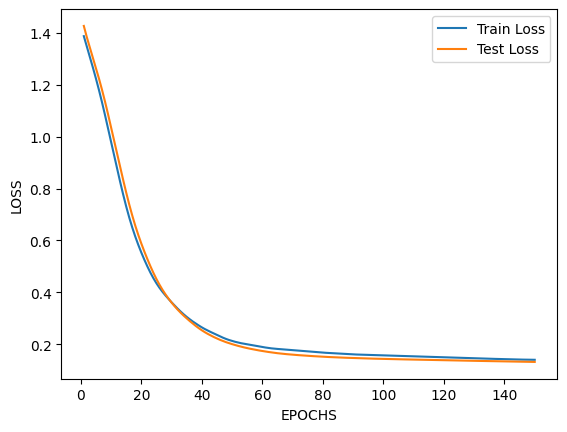

In [180]:
#loss curve
plt.plot(epoch_count,
         test_loss_val,
         label='Train Loss')

plt.plot(epoch_count,
         loss_val, 
         label='Test Loss')

plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

In [181]:
#saving and loading the model
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="02_AirQualityClassification.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
print(f"saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)


saving model to models/02_AirQualityClassification.pth


In [182]:
#loading model
loaded_model=NeuralNet(9,4)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-182-953b2bdab37d>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>